<a href="https://colab.research.google.com/github/Shimad01/Covid19---Data-Visualization/blob/main/Covid_19_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1 - Database and general information

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

> Font: https://github.com/CSSEGISandData/COVID-19

## A) Adjusting the database

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!pip install statsmodels==v0.11.0rc2

  Using cached https://files.pythonhosted.org/packages/a8/17/44a9f61db85d7adb3b84a381a7ca6493385ea2734eb3e38ef78faadcfa16/statsmodels-0.11.0rc2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: pmdarima 1.8.0 has requirement statsmodels!=0.12.0,>=0.11, but you'll have statsmodels 0.11.0rc2 which is incompatible.
  Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed = confirmed.groupby('Country/Region').sum()
confirmed.drop(columns = ['Lat', 'Long'], inplace = True)
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1521,1531,1536,1537,1537,1539,1540,1544,1546,1548,1548,1548,1549,1551,1553,1651,1657,1767,1817,1850,1882,1948,1957,1976,1985,2001,2050,2064,2091,2140,2142,2195,2228,2269,2311,2329,2347,2362,2368,2383
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,149769,150505,151142,151569,152031,152555,153093,153590,154063,154557,155006,155414,155884,156393,156996,157593,158168,158559,158962,159443,159956,160426,161087,161559,162029,162601,163213,163975,164736,165535,166200,166800,167604,168444,169487,170527,171154,171717,172315,173635
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2109,2110,2111,2112,2112,2113,2115,2115,2115,2118,2118,2118,2118,2119,2120,2120,2120,2120,2121,2122,2122,2122,2122,2124,2127,2127,2131,2131,2133,2134,2136,2136,2145,2145,2148,2151,2154,2157,2157,2165


In [3]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
deaths = deaths.groupby('Country/Region').sum()
deaths.drop(columns = ['Lat', 'Long'], inplace = True)
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2301,2314,2324,2336,2339,2343,2346,2354,2363,2370,2373,2378,2385,2389,2389,2397,2399,2400,2400,2404,2405,2406,2407,2407,2408,2410,2413,2414,2418,2419,2424,2427,2427,2427,2428,2428,2430,2430,2430,2432
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1256,1261,1265,1270,1277,1281,1287,1291,1296,1303,1310,1315,1324,1332,1339,1350,1358,1369,1380,1393,1398,1404,1418,1433,1446,1460,1472,1488,1503,1517,1531,1543,1555,1567,1582,1600,1617,1636,1653,1666
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2819,2822,2827,2831,2836,2840,2843,2849,2853,2856,2861,2863,2866,2871,2877,2881,2884,2888,2891,2894,2898,2900,2904,2909,2909,2914,2918,2924,2926,2930,2932,2935,2939,2943,2945,2947,2950,2954,2958,2961
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,87,88,88,91,91,91,92,92,93,93,96,96,97,97,98,100,100,101,101,101,102,103,103,104,105,106,106,106,106,106,106,107,107,107,107,107,107,107,107,107
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,424,425,428,431,436,439,442,444,448,452,457,459,461,462,462,464,464,464,466,466,468,470,473,474,475,475,475,478,487,487,490,491,492,493,494,496,498,498,498,499


In [4]:
last_date = confirmed.iloc[-1].index[-1]
last_date

'2/21/21'

In [5]:
print(f'Day: {last_date}')
print(f'Confirmed Cases: {confirmed[last_date].sum()}')
print(f'Deaths Cases: {deaths[last_date].sum()}')
print(f'Letality: {round(deaths[last_date].sum()/confirmed[last_date].sum()*100,2)}%')

Day: 2/21/21
Confirmed Cases: 111433098
Deaths Cases: 2467139
Letality: 2.21%


## B) Current Data

In [6]:
Current = pd.DataFrame ([confirmed.sum(), deaths.sum()],
                      index = ['confirmed', 'deaths']).T
Current['case increase'] = Current['confirmed'].diff()
Current['death increase'] = Current['deaths'].diff()
Current['letality'] = round(Current['deaths'] / Current['confirmed']*100,2)
Current.tail(5)

,confirmed,deaths,case increase,death increase,letality
2/17/21,109906536,2430474,395092.0,11313.0,2.21
2/18/21,110309745,2441638,403209.0,11164.0,2.21
2/19/21,110749140,2452744,439395.0,11106.0,2.21
2/20/21,111119405,2461259,370265.0,8515.0,2.21
2/21/21,111433098,2467139,313693.0,5880.0,2.21


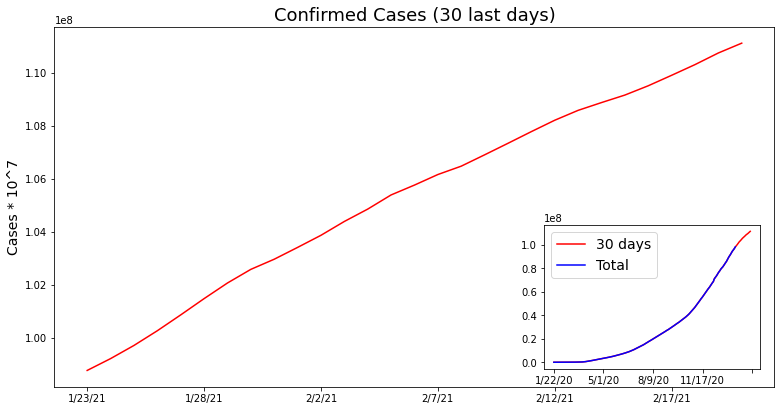

In [7]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_axes([0,0,1,1])
ax1 = Current['confirmed'][-30:-1].plot(color = 'r')
ax1.set_title('Confirmed Cases (30 last days)', fontsize = 18)
ax1.set_ylabel('Cases * 10^7', fontsize = 14)

ax2 = fig.add_axes([0.68,0.05,0.3,0.4])
ax2 = Current['confirmed'].plot(color = 'r')
ax2 = Current['confirmed'][:-30].plot(color = 'b')
ax2.legend(['30 days', 'Total'], fontsize = 14)

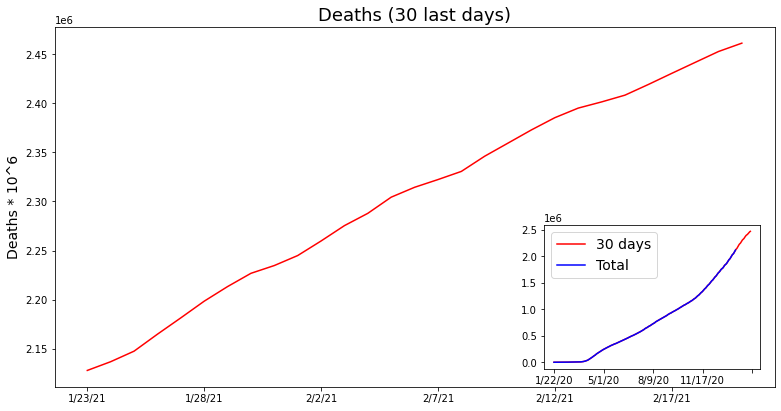

In [8]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_axes([0,0,1,1])
ax1 = Current['deaths'][-30:-1].plot(color = 'r')
ax1.set_title('Deaths (30 last days)', fontsize = 18)
ax1.set_ylabel('Deaths * 10^6', fontsize = 14)

ax2 = fig.add_axes([0.68,0.05,0.3,0.4])
ax2 = Current['deaths'].plot(color = 'r')
ax2 = Current['deaths'][:-30].plot(color = 'b')
ax2.legend(['30 days', 'Total'], fontsize = 14)

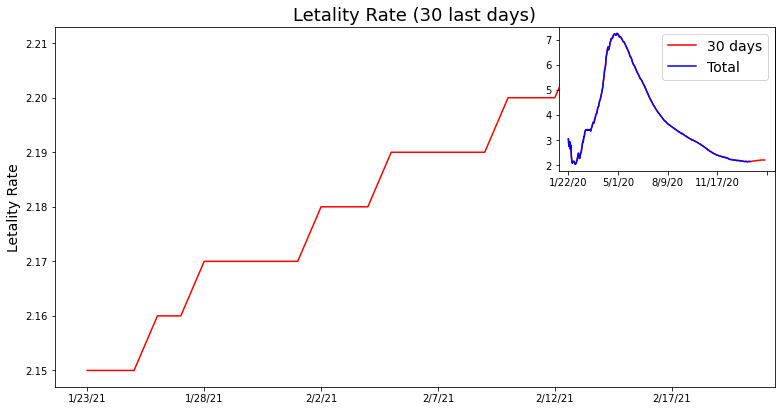

In [9]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_axes([0,0,1,1])
ax1 = Current['letality'][-30:-1].plot(color = 'r')
ax1.set_title('Letality Rate (30 last days)', fontsize = 18)
ax1.set_ylabel('Letality Rate', fontsize = 14)

ax2 = fig.add_axes([0.7,0.6,0.3,0.4])
ax2 = Current['letality'].plot(color = 'r')
ax2 = Current['letality'][:-30].plot(color = 'b')
ax2.legend(['30 days', 'Total'], fontsize = 14)

## C) Data from the most infected countries

In [10]:
confirmed_current = pd.DataFrame(confirmed[last_date])
confirmed_current.rename(columns = {last_date:'confirmed'}, inplace = True)

deaths_current = pd.DataFrame(deaths[last_date])
deaths_current.rename(columns = {last_date:'deaths'}, inplace = True)

country_current = confirmed_current.join(deaths_current, on = 'Country/Region')
country_current['letality'] = round((country_current['deaths'] / country_current['confirmed'] * 100),2)
country_current.sort_values('confirmed', ascending = False)

,confirmed,deaths,letality
Country/Region,,,
US,28134115,498897,1.77
India,11005850,156385,1.42
Brazil,10168174,246504,2.42
United Kingdom,4127574,120810,2.93
Russia,4117992,81926,1.99
...,...,...,...
MS Zaandam,9,2,22.22
Marshall Islands,4,0,0.00
Samoa,3,0,0.00


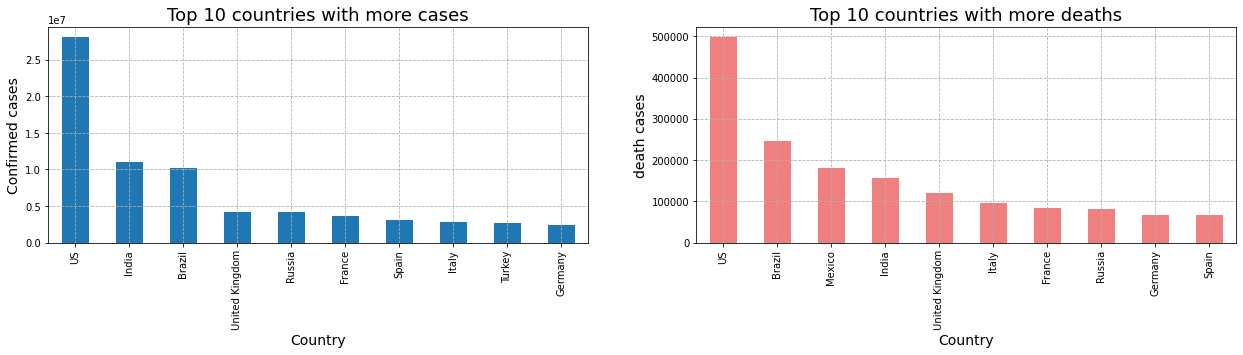

In [11]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_axes([0,0,0.5,0.6])
ax1 = country_current.sort_values('confirmed', ascending = False).iloc[:10,0].plot(kind = 'bar')
ax1.set_title ('Top 10 countries with more cases', fontsize = 18)
ax1.set_xlabel('Country', fontsize = 14)
ax1.set_ylabel('Confirmed cases', fontsize = 14)
ax1.grid(True, linestyle = '--')

ax2 = fig.add_axes([0.6,0,0.5,0.6])
ax2 = country_current.sort_values('deaths', ascending = False).iloc[:10,1].plot(kind = 'bar', color = 'lightcoral')
ax2.set_title ('Top 10 countries with more deaths', fontsize = 18)
ax2.set_xlabel('Country', fontsize = 14)
ax2.set_ylabel('death cases', fontsize = 14)
ax2.grid(True, linestyle = '--')


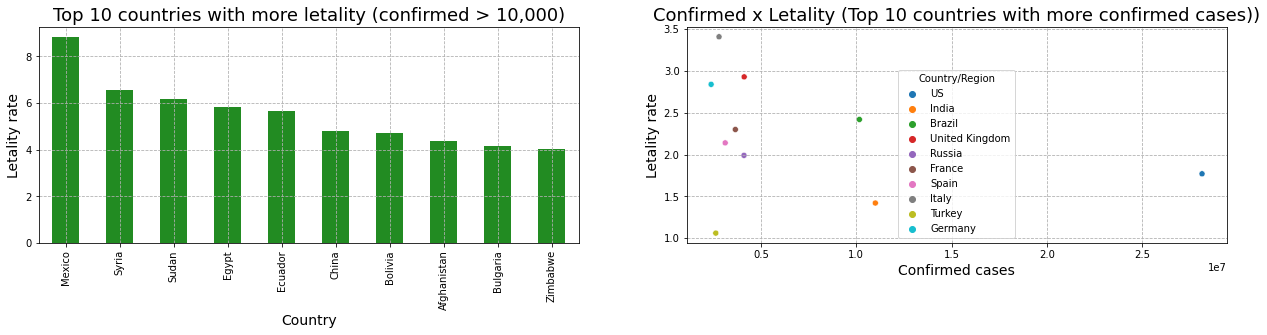

In [12]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_axes([0,0,0.5,0.6])
ax1 = country_current.query('confirmed > 10000').sort_values('letality', ascending = False).iloc[:10,2].plot(kind = 'bar', color = 'forestgreen')
ax1.set_title ('Top 10 countries with more letality (confirmed > 10,000)', fontsize = 18)
ax1.set_xlabel('Country', fontsize = 14)
ax1.set_ylabel('Letality rate', fontsize = 14)
ax1.grid(True, linestyle = '--')

ax2 = fig.add_axes([0.6,0,0.5,0.6])
ax2 = sns.scatterplot(data = (country_current.sort_values('confirmed', ascending = False).iloc[:10,:]), x = 'confirmed', y = 'letality', hue = 'Country/Region')
ax2.set_title ('Confirmed x Letality (Top 10 countries with more confirmed cases))', fontsize = 18)
ax2.set_xlabel('Confirmed cases', fontsize = 14)
ax2.set_ylabel('Letality rate', fontsize = 14)
ax2.grid(True, linestyle = '--')

## D) Countries Information

### Function

In [13]:
def graphic_country(data, country):

  title1 = str(country + ' - Confirmed Cases')
  title2 = str(country + ' - Daily Caes')
  title3 = str(country + ' - Case Increase (MA 7 days)')
  title4 = str(country + ' - Fatal Cases')
  title5 = str(country + ' - Daily Deaths')
  title6 = str(country + ' - Death Increase (MA 7 days)')

  fig = plt.figure(figsize = (13,6))
  ax1 = fig.add_axes([-0.1,0,0.5,0.6])
  ax1 = data['confirmed'].plot()
  ax1.set_title (title1, fontsize = 18)
  ax1.set_xlabel('')
  ax1.set_ylabel('Confirmed Cases', fontsize = 14)
  ax1.grid(True, linestyle = '--')

  ax2 = fig.add_axes([0.5,0,0.5,0.6])
  ax2 = data['case increase'].plot()
  ax2.set_title (title2, fontsize = 18)
  ax2.set_xlabel('')
  ax2.set_ylabel('Confirmed Cases', fontsize = 14)
  ax2.grid(True, linestyle = '--')

  ax3 = fig.add_axes([1.1,0,0.5,0.6])
  ax3 = data['case increase (MA 7 days)'].plot()
  ax3.set_title (title3, fontsize = 18)
  ax3.set_xlabel('')
  ax3.set_ylabel('Confirmed Cases', fontsize = 14)
  ax3.grid(True, linestyle = '--')

  ax4 = fig.add_axes([-0.1,-0.8,0.5,0.6])
  ax4 = data['deaths'].plot(color = 'r')
  ax4.set_title (title4, fontsize = 18)
  ax4.set_xlabel('')
  ax4.set_ylabel('Fatal Cases', fontsize = 14)
  ax4.grid(True, linestyle = '--')

  ax5 = fig.add_axes([0.5,-0.8,0.5,0.6])
  ax5 = data['death increase'].plot(color = 'r')
  ax5.set_title (title5, fontsize = 18)
  ax5.set_xlabel('')
  ax5.set_ylabel('Fatal Cases', fontsize = 14)
  ax5.grid(True, linestyle = '--')

  ax6 = fig.add_axes([1.1,-0.8,0.5,0.6])
  ax6 = data['death increase (MA 7 days)'].plot(color = 'r')
  ax6.set_title (title6, fontsize = 18)
  ax6.set_xlabel('')
  ax6.set_ylabel('Fatal Cases', fontsize = 14)
  ax6.grid(True, linestyle = '--')

In [14]:
def info_country(country):
  temp = pd.DataFrame(data = (confirmed.loc[country], deaths.loc[country])).T
  temp.columns = ['confirmed','deaths']
  temp['letality'] = round((temp['deaths'] / temp['confirmed'] * 100),2)
  temp['case increase'] = temp['confirmed'].diff()
  temp['case increase (MA 7 days)'] = temp['case increase'].rolling(7).mean()
  temp['death increase'] = temp['deaths'].diff()
  temp['death increase (MA 7 days)'] = temp['death increase'].rolling(7).mean()
  temp.index.rename('Data', inplace = True)
  graphic_country(temp, country)

  return temp

### I) US

,confirmed,deaths,letality,case increase,case increase (MA 7 days),death increase,death increase (MA 7 days)
Data,,,,,,,
2/17/21,27830489,490825,1.76,69829.0,77579.714286,2380.0,2047.000000
2/18/21,27899755,493138,1.77,69266.0,72418.000000,2313.0,1927.285714
2/19/21,28006110,495827,1.77,106355.0,73405.285714,2689.0,1898.857143
2/20/21,28077620,497648,1.77,71510.0,71194.714286,1821.0,1850.428571
2/21/21,28134115,498897,1.77,56495.0,69986.000000,1249.0,1872.285714


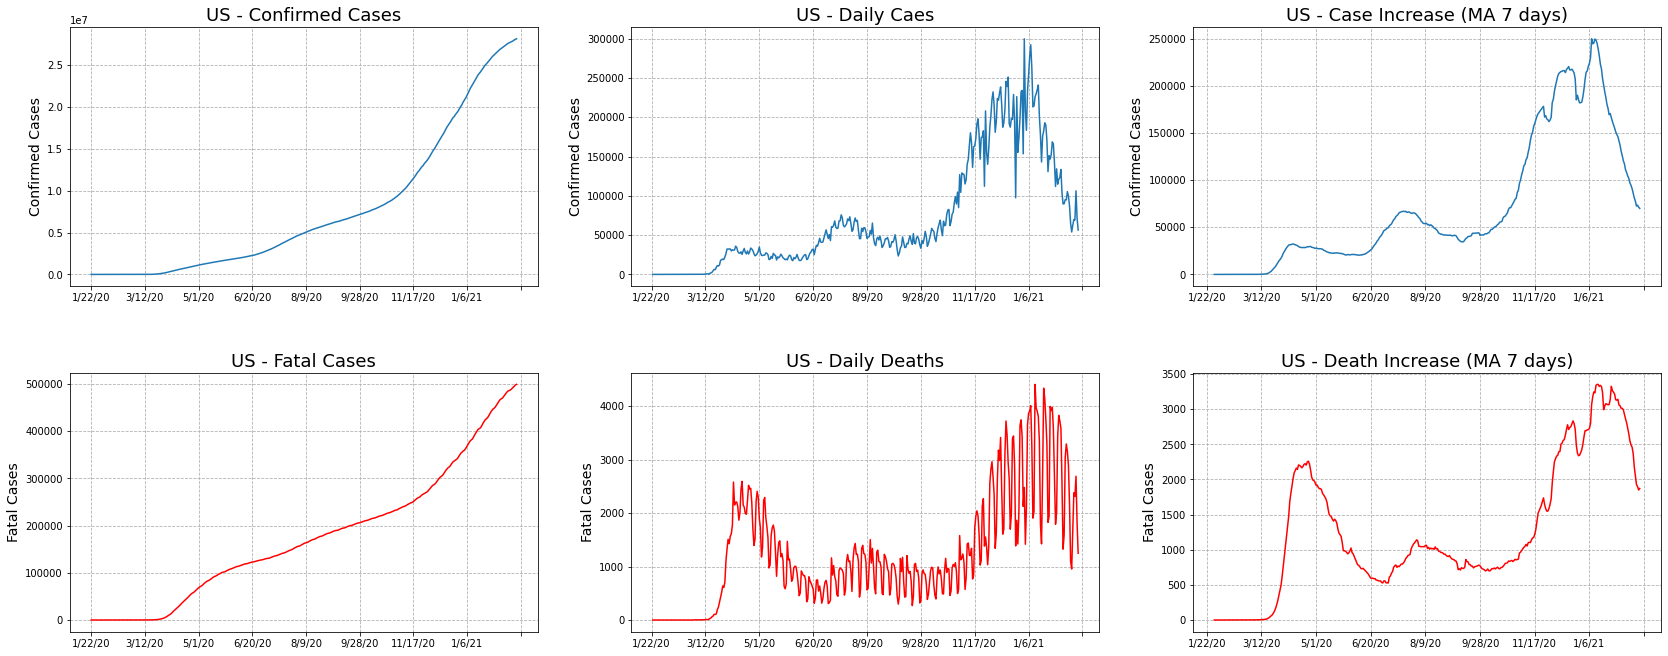

In [15]:
US = info_country('US')
US.tail()

### II) Brazil

,confirmed,deaths,letality,case increase,case increase (MA 7 days),death increase,death increase (MA 7 days)
Data,,,,,,,
2/17/21,9978747,242090,2.43,56766.0,45654.285714,1150.0,1034.285714
2/18/21,10030626,243457,2.43,51879.0,45245.285714,1367.0,1036.571429
2/19/21,10084208,244737,2.43,53582.0,45536.142857,1280.0,1035.428571
2/20/21,10139148,245977,2.43,54940.0,47056.285714,1240.0,1063.571429
2/21/21,10168174,246504,2.42,29026.0,47665.857143,527.0,1037.000000


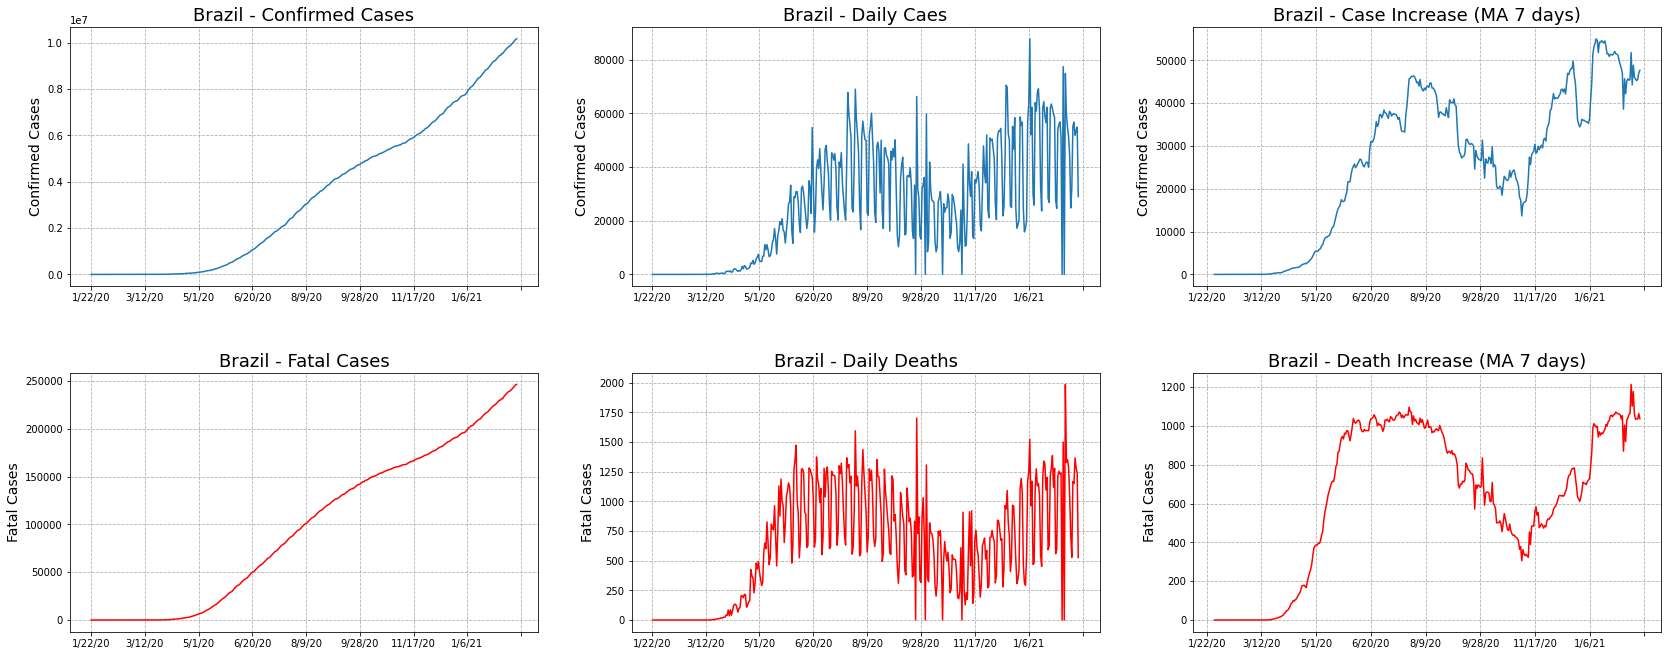

In [16]:
Brazil = info_country('Brazil')
Brazil.tail()

### III) India

,confirmed,deaths,letality,case increase,case increase (MA 7 days),death increase,death increase (MA 7 days)
Data,,,,,,,
2/17/21,10950201,156014,1.42,12881.0,11272.428571,101.0,93.428571
2/18/21,10963394,156111,1.42,13193.0,11827.285714,97.0,94.857143
2/19/21,10977387,156212,1.42,13993.0,12091.571429,101.0,94.571429
2/20/21,10991651,156302,1.42,14264.0,12387.285714,90.0,94.285714
2/21/21,11005850,156385,1.42,14199.0,12751.571429,83.0,93.285714


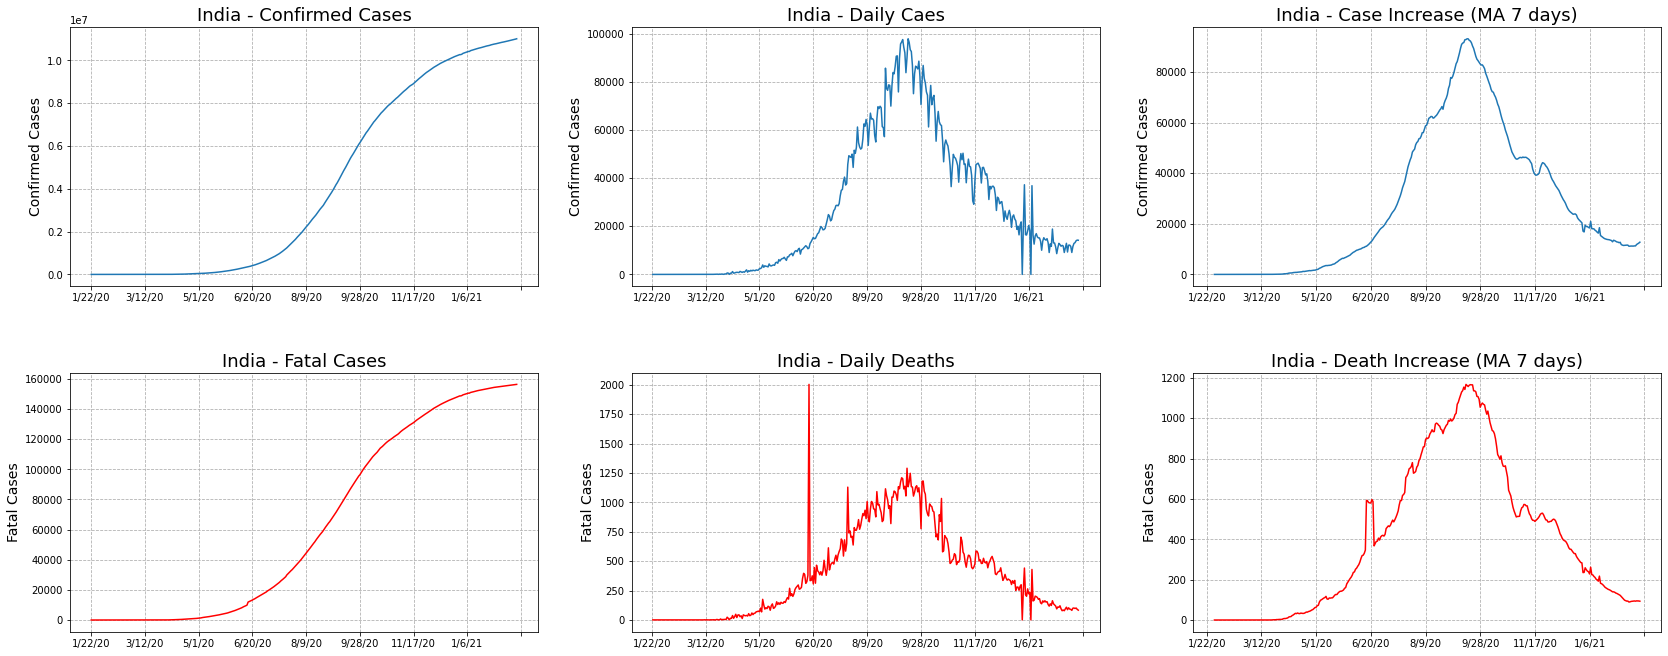

In [17]:
India = info_country('India')
India.tail()

### IV) Select Country

In [18]:
# name_country = input('Select a country: ')
# country = info_country(name_country)

# Part 2 - Covid-19 and population

## A) Adjusting the database

In [19]:
population = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')
population['PopTotal'] = population['PopTotal'] * 1000
population['%PopMale'] = round(100 *population['PopMale'] /(population['PopMale'] + population['PopFemale']),2)
population['%PopFemale'] = 100 - population['%PopMale'] 
population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,%PopMale,%PopFemale
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874,52.88,47.12
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009,52.74,47.26
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156,52.60,47.40
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315,52.47,47.53
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486,52.34,47.66


In [20]:
population_2019 = population.query('Time == 2019')[['Location', 'PopTotal', 'PopDensity', '%PopMale', '%PopFemale']].set_index('Location')
population_2019

,PopTotal,PopDensity,%PopMale,%PopFemale
Location,,,,
Afghanistan,3.804176e+07,58.269,51.34,48.66
Africa,1.308064e+09,44.119,49.96,50.04
African Group,1.306321e+09,44.464,49.96,50.04
African Union,1.306903e+09,44.085,49.96,50.04
African Union: Central Africa,1.540137e+08,29.192,49.96,50.04
...,...,...,...,...
World,7.713468e+09,59.291,50.42,49.58
World Bank Regional Groups (developing only),6.452517e+09,70.258,50.54,49.46
Yemen,2.916192e+07,55.234,50.38,49.62


In [21]:
population_2019.query ('Location.str.contains("Mya")', engine = 'python')

,PopTotal,PopDensity,%PopMale,%PopFemale
Location,,,,
Myanmar,54045422.0,82.728,48.19,51.81


In [22]:
def rename_location(location):
  if location == 'United States of America':
    return 'US'
  if location == 'Russian Federation':
    return 'Russia'
  if location == 'Iran (Islamic Republic of)':
    return 'Iran'
  if location == 'Bolivia (Plurinational State of)':
    return 'Bolivia'
  if location == 'Republic of Moldova':
    return 'Moldova'
  if location == 'Venezuela (Bolivarian Republic of)':
    return 'Venezuela' 
  if location == 'Republic of Korea':
    return 'Korea, South'
  if location == 'Myanmar':
    return 'Burma'
  return location

population_2019['Location2'] = population_2019.index.map(rename_location)
population_2019 = population_2019.set_index('Location2')
population_2019.rename_axis('Location',inplace= True)
population_2019.head()

,PopTotal,PopDensity,%PopMale,%PopFemale
Location,,,,
Afghanistan,3.804176e+07,58.269,51.34,48.66
Africa,1.308064e+09,44.119,49.96,50.04
African Group,1.306321e+09,44.464,49.96,50.04
African Union,1.306903e+09,44.085,49.96,50.04
African Union: Central Africa,1.540137e+08,29.192,49.96,50.04


In [23]:
covid_pop = country_current.join(population_2019)
covid_pop = covid_pop.dropna(subset = ['PopTotal'])
covid_pop.sort_values('confirmed', ascending = False)

,confirmed,deaths,letality,PopTotal,PopDensity,%PopMale,%PopFemale
US,28134115,498897,1.77,3.290649e+08,35.974,49.48,50.52
India,11005850,156385,1.42,1.366418e+09,459.580,51.97,48.03
Brazil,10168174,246504,2.42,2.110495e+08,25.251,49.15,50.85
United Kingdom,4127574,120810,2.93,6.753016e+07,279.131,49.39,50.61
Russia,4117992,81926,1.99,1.458723e+08,8.907,46.34,53.66
...,...,...,...,...,...,...,...
Solomon Islands,18,0,0.00,6.698210e+05,23.931,50.85,49.15
Marshall Islands,4,0,0.00,5.879100e+04,326.617,NaN,NaN
Samoa,3,0,0.00,1.970930e+05,69.644,51.75,48.25
Micronesia,1,0,0.00,5.434830e+05,171.446,50.53,49.47


In [24]:
covid_pop['incidence_ratio'] = covid_pop['confirmed'] / covid_pop['PopTotal'] * 100000 
covid_pop['mortality_ratio'] = covid_pop['deaths'] / covid_pop['PopTotal'] * 100000
# covid_pop.sort_values('incidence_ratio', ascending = False)
covid_pop.loc[['US']]

,confirmed,deaths,letality,PopTotal,PopDensity,%PopMale,%PopFemale,incidence_ratio,mortality_ratio
US,28134115,498897,1.77,329064917.0,35.974,49.48,50.52,8549.715739,151.61051


## B) General Information

Text(393.80000000000007, 0.5, 'Mortality Ratio')

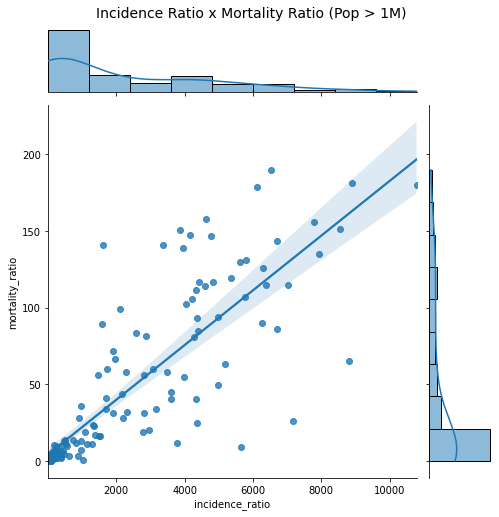

In [25]:
ax = sns.jointplot(data = covid_pop.query('PopTotal > 1000000'), x ='incidence_ratio', y = 'mortality_ratio', kind = 'reg',height = 7)
ax.fig.suptitle ('Incidence Ratio x Mortality Ratio (Pop > 1M)', fontsize = 14, y = 1.02)
plt.xlabel('Incidence Ratio', fontsize = 14)
plt.ylabel('Mortality Ratio', fontsize = 14)

Text(393.80000000000007, 0.5, 'Population Density')

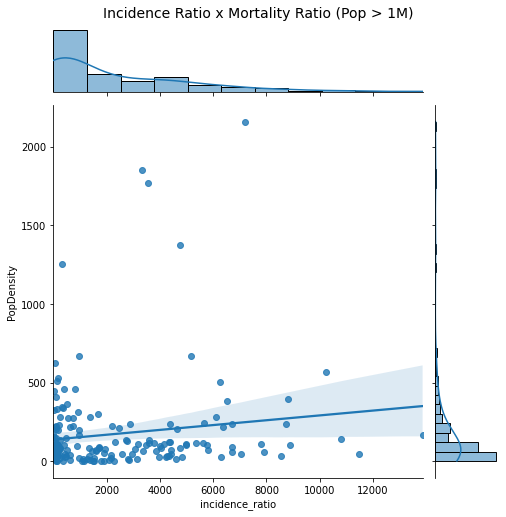

In [26]:
ax = sns.jointplot(data = covid_pop.query('PopDensity < 3000'), x ='incidence_ratio', y = 'PopDensity', kind = 'reg',height = 7)
ax.fig.suptitle ('Incidence Ratio x Mortality Ratio (Pop > 1M)', fontsize = 14, y = 1.02)
plt.xlabel('Incidence Ratio', fontsize = 14)
plt.ylabel('Population Density', fontsize = 14)

## I) General Information

In [27]:
df_br_total = pd.DataFrame (data = (confirmed.loc['Brazil'], deaths.loc['Brazil']), index = ['confirmed', 'deaths']).T
df_br_total = df_br_total.query('confirmed != 0')
df_br_total.reset_index(inplace = True)
df_br_total.rename(columns = {'Data':'date'}, inplace = True)
df_br_total = df_br_total[['date', 'confirmed', 'deaths']]
df_br_total['date'] = pd.to_datetime(df_br_total['date'])

df_br_total['newCases'] = df_br_total['confirmed'].diff()
df_br_total['newDeaths'] = df_br_total['deaths'].diff()

df_br_total['newCasesMA7'] = df_br_total['newCases'].rolling(7).mean().round()
df_br_total['newCasesMA14'] = df_br_total['newCases'].rolling(14).mean().round()

df_br_total['newDeathsMA7'] = df_br_total['newDeaths'].rolling(7).mean().round()
df_br_total['newDeathsMA14'] = df_br_total['newDeaths'].rolling(14).mean().round()

df_br_total.tail()

,date,confirmed,deaths,newCases,newDeaths,newCasesMA7,newCasesMA14,newDeathsMA7,newDeathsMA14
357,2021-02-17,9978747,242090,56766.0,1150.0,45654.0,45666.0,1034.0,1038.0
358,2021-02-18,10030626,243457,51879.0,1367.0,45245.0,45310.0,1037.0,1047.0
359,2021-02-19,10084208,244737,53582.0,1280.0,45536.0,45503.0,1035.0,1050.0
360,2021-02-20,10139148,245977,54940.0,1240.0,47056.0,49427.0,1064.0,1139.0
361,2021-02-21,10168174,246504,29026.0,527.0,47666.0,45967.0,1037.0,1069.0


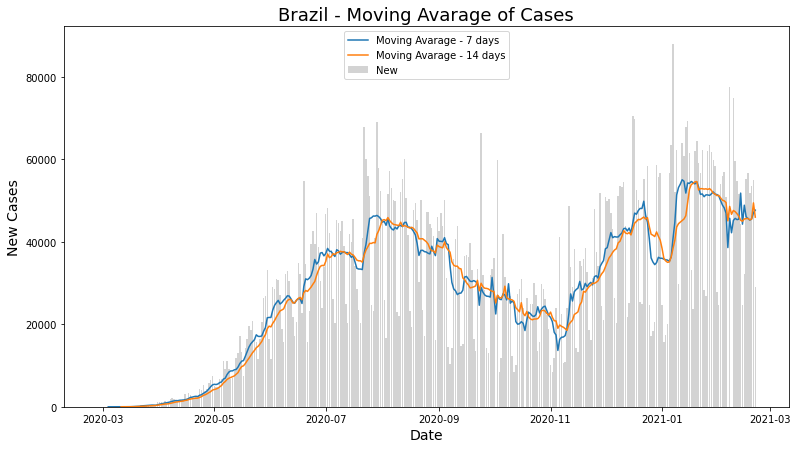

In [28]:
plt.figure(figsize = (13,7))
ax = sns.lineplot(x = 'date', y = 'newCasesMA7', data = df_br_total)
ax = sns.lineplot(x = 'date', y = 'newCasesMA14', data = df_br_total)
plt.bar(df_br_total['date'], df_br_total['newCases'], color = 'lightgrey')
ax.set_title('Brazil - Moving Avarage of Cases', fontsize = 18)
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel('New Cases', fontsize = 14)
ax.legend(['Moving Avarage - 7 days', 'Moving Avarage - 14 days', 'New'])

ax = ax

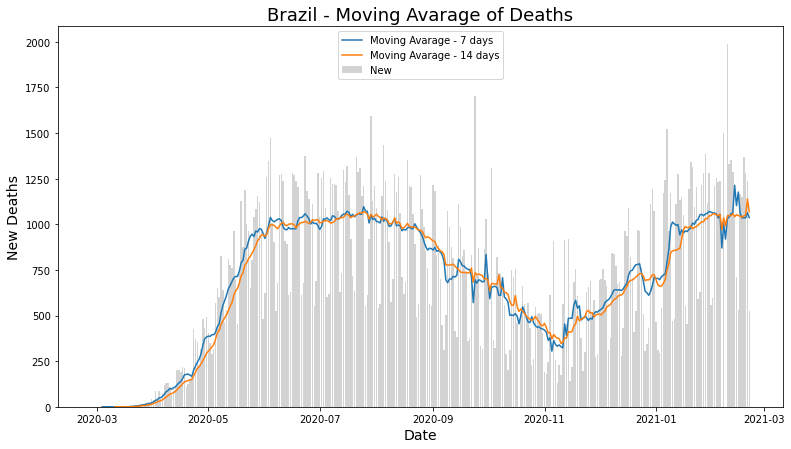

In [29]:
plt.figure(figsize = (13,7))
ax = sns.lineplot(x = 'date', y = 'newDeathsMA7', data = df_br_total)
ax = sns.lineplot(x = 'date', y = 'newDeathsMA14', data = df_br_total)
plt.bar(df_br_total['date'], df_br_total['newDeaths'], color = 'lightgrey')
ax.set_title('Brazil - Moving Avarage of Deaths', fontsize = 18)
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel('New Deaths', fontsize = 14)
ax.legend(['Moving Avarage - 7 days', 'Moving Avarage - 14 days', 'New'])

ax = ax

Moving Avarage - Visually the moving average data using 7 or 14 days show the same behavior, for future calculations, the 7-day data will be used

## II) Autocorrelation

In [30]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import datetime 

In [31]:
df_br_total['dayOfWeek'] = df_br_total['date'].dt.day_name()
df_br_dayOfWeek = df_br_total.groupby('dayOfWeek').mean()[['newCases','newDeaths']].round()
df_br_dayOfWeek = df_br_dayOfWeek.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
df_br_dayOfWeek

,newCases,newDeaths
dayOfWeek,,
Sunday,17011.0,392.0
Monday,15258.0,410.0
Tuesday,32407.0,846.0
Wednesday,35553.0,856.0
Thursday,35226.0,857.0
Friday,32116.0,747.0
Saturday,29570.0,673.0


Text(0, 0.5, 'New Deaths')

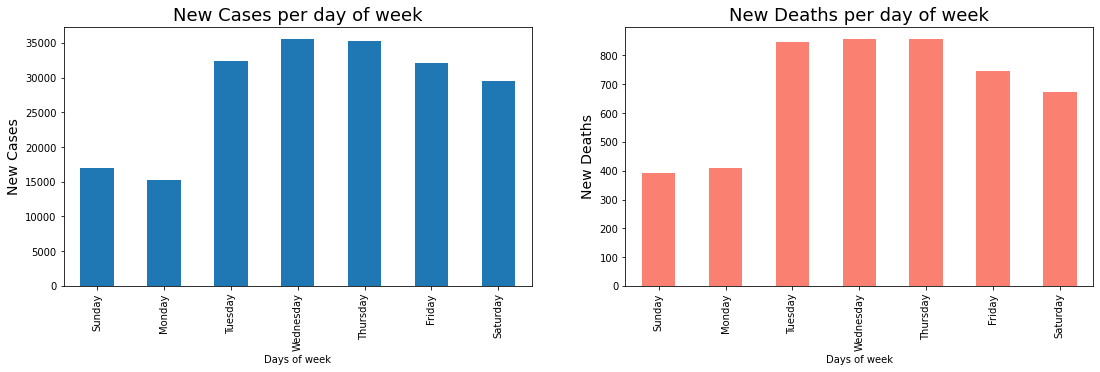

In [32]:
fig = plt.figure(figsize = (13,6))
ax1 = fig.add_axes([-0.1,0,0.5,0.6])
ax1 = df_br_dayOfWeek['newCases'].plot(kind = 'bar')
ax1.set_title ('New Cases per day of week', fontsize = 18)
ax1.set_xlabel('Days of week')
ax1.set_ylabel('New Cases', fontsize = 14)

ax2 = fig.add_axes([0.5,0,0.5,0.6])
ax2 = df_br_dayOfWeek['newDeaths'].plot(kind = 'bar', color = 'salmon')
ax2.set_title ('New Deaths per day of week', fontsize = 18)
ax2.set_xlabel('Days of week')
ax2.set_ylabel('New Deaths', fontsize = 14)


**Group 1 - Sunday + Monday** 

**Group 2 - Tuesday --> Saturday**

[Using CompareMeans](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.CompareMeans.html
)

### $\mu_1 \Rightarrow$ Group 1 (Sunday + Monday) - Mean
### $\mu_2 \Rightarrow$ Group 2 (Tuesday --> Saturday) - Mean
### $
\begin{cases}
H_0: \mu_1 = \mu_2\\
H_1: \mu_1 \neq \mu_2
\end{cases}
$

In [33]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [34]:
group1 = df_br_total[(df_br_total['dayOfWeek'] == 'Sunday') | (df_br_total['dayOfWeek'] == 'Monday')]
group1_cases = group1.iloc[-30:,2].values
group1_deaths = group1.iloc[-30:,3].values

group2 = df_br_total[(df_br_total['dayOfWeek'] != 'Sunday') & (df_br_total['dayOfWeek'] != 'Monday')]
group2_cases = group2.iloc[-30:,2].values
group2_deaths = group2.iloc[-30:,3].values

In [35]:
test1_cases = DescrStatsW(group1_cases)
test2_cases = DescrStatsW(group2_cases)
test_cases = CompareMeans(test1_cases, test2_cases)
_, p_value_confirmed = test_cases.ztest_ind (value = 0)

test1_deaths = DescrStatsW(group1_deaths)
test2_deaths = DescrStatsW(group2_deaths)
test_deaths = CompareMeans(test1_deaths, test2_deaths)
_, p_value_deaths = test_deaths.ztest_ind (value = 0)

print(f'P-Value Cases = {p_value_confirmed}')
print(f'P-Value Deaths = {p_value_deaths}')

P-Value Cases = 1.946373745033558e-07
P-Value Deaths = 3.0942263003810893e-25


> $p-value \leq\alpha \Rightarrow$ Rejection of the null hypothesis (Cases and Deaths)

> $\mu_1 \neq \mu_2$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


(<Figure size 432x288 with 4 Axes>,)

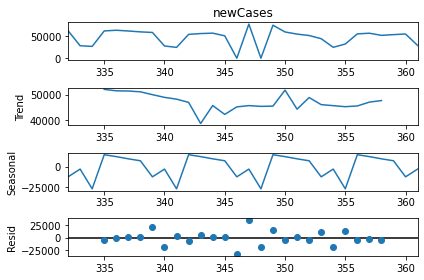

In [36]:
model_sd = seasonal_decompose(df_br_total['newCases'][-30:], freq = 7)
model_sd.plot(),

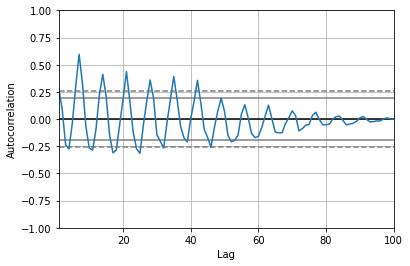

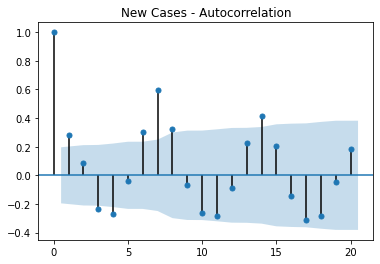

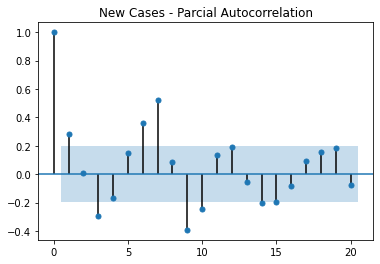

In [37]:
autocorrelation_plot(df_br_total['newCases'][-100:])
plot_acf(df_br_total[['newCases']][-100:], title = 'New Cases - Autocorrelation');
plot_pacf(df_br_total[['newCases']][-100:], title = 'New Cases - Parcial Autocorrelation');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


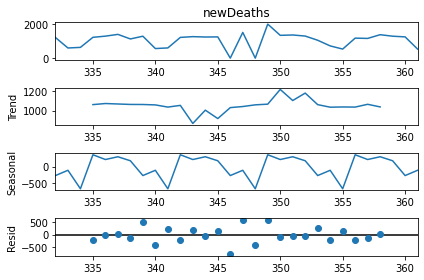

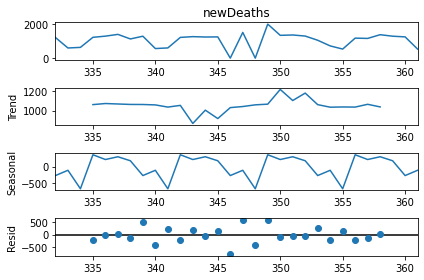

In [38]:
model_sd = seasonal_decompose(df_br_total['newDeaths'][-30:], freq = 7)
model_sd.plot()

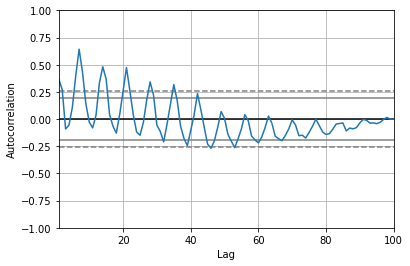

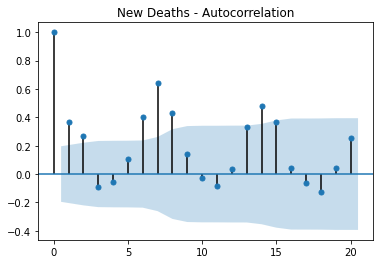

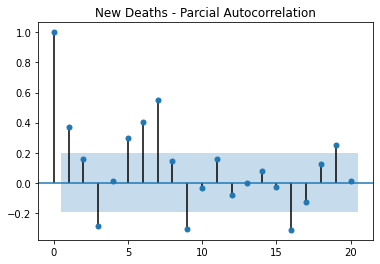

In [39]:
autocorrelation_plot(df_br_total['newDeaths'][-100:])
plot_acf(df_br_total[['newDeaths']][-100:], title = 'New Deaths - Autocorrelation');
plot_pacf(df_br_total[['newDeaths']][-100:], title = 'New Deaths - Parcial Autocorrelation');

> Conclusion: According to the correlation graphs, values from the last 10 days appear to have a stronger influence on current values